In [5]:
import pandas as pd
import numpy as np

from google.colab import files
abrir=files.upload()



Saving empleados.csv to empleados.csv


In [6]:
# A continuación vemos en el encabezado de nuestra BBDD para saber que datos necesitamos para el analisis mostrando los primeros 5 datos
empleados=pd.read_csv('empleados.csv')
empleados.head()


,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [8]:
# Es necesario saber cuántos registros tiene nuestra BBDD (1.000 datos), además saber cuánta información podemos tener de ella (8 informaciones diferentes)
empleados.shape

(1000, 8)

In [10]:
# A continuación podemos observar que la desvación estandar del saladrio a nivel general es baja puesto que el dato está mas cernano a su media
empleados.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [11]:
# Podemos observar que la mayoria de los dato tiene toda la información,
#algunos datos que están "nulos", son datos poco relevantes para un anáslisis, como pueder el nombre de la persona; un dato imporante que no tiene información es el "género",
#pero lo podemos reemplazar por "genero no definido", de esta manera evitaremos la eliminación de 145 datos los cuales puede afectar el analisis.
empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [14]:
# En el siguiente recuadro podemos complementar la información anterior
empleados.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [19]:
#Dado lo anterior, es necesario reemplazar los N/A por información que no altere el analisis, por ejemplo reemplazar el campo de nombres vaciones por "nombre no definido"
empleados["First Name"].fillna("Nombre no definido", inplace=True)


In [20]:
empleados.isnull().sum()

First Name             0
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [27]:
#Dado a que es muy elevado la cantidad de datos en N/A sobre el genero, es necesario saber cuantos son masculinos o femeninos para saber si reemplazamos por el que mas se reptie
# o en su defencto reemplazarlo por una categoria no definida
from pandas.core.arrays.interval import value_counts
empleados['Gender'].value_counts()

Female    431
Male      424
Name: Gender, dtype: int64

In [28]:
#Dado a que la distribución del género es muy similar, podemos reemplazar los N/A por "Genero no definido"
empleados["Gender"].fillna("Genero no definido", inplace=True)

In [29]:
empleados.isnull().sum()

First Name            0
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [30]:
#Dado que el campo "Senior Management" tiene tantos datos en N/A, es necesario saber la cantidad de cada categoria (true-false) para saber si la remplazamos por la mayor
#paticipación, al ser tan similiar, los mas conveniente es reemplazarla por "Senior Management no definido", no es factible eliminar toda la fila ya que hay información importenta
#sobre otras colimmnas, hacemos lo mismo con "Tema"
from pandas.core.arrays.interval import value_counts
empleados['Senior Management'].value_counts()

True     468
False    465
Name: Senior Management, dtype: int64

In [34]:
empleados["Senior Management"].fillna("Senior Management no definido", inplace=True)
empleados["Team"].fillna("Team no definido", inplace=True)
empleados.isnull().sum()

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

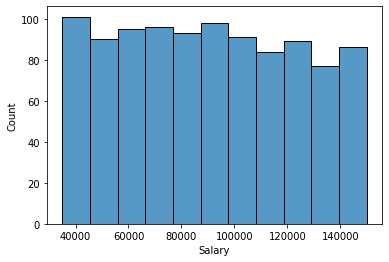

In [35]:
# Para realizar un analisis, es necesario el apoyo de gráficos para brindar una informaciás mas visual y así mas sencilla de interpretar
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x='Salary', data=empleados, )
plt.show()

# La siguiente gráfica nos muestra que la cantidad de salario con un rango de 400.000 a 499.999 es solamente de personas, es decir un 10%

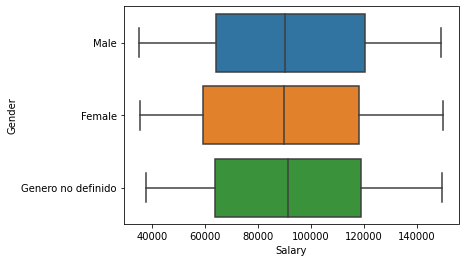

In [36]:
#En la siguiente gráfica podemos evidenciar que aquen los promedio de los dos salaris es muy similar, nos encontramos que el sexo femenino tiene un rago mas amplio en salarios,
# sim embargo nos encontramos con una media similiar entre dos los gpeneros (91.180 genero femenino y 90.023 genero masculino)
sns.boxplot(x="Salary",y="Gender", data=empleados, )
plt.show()

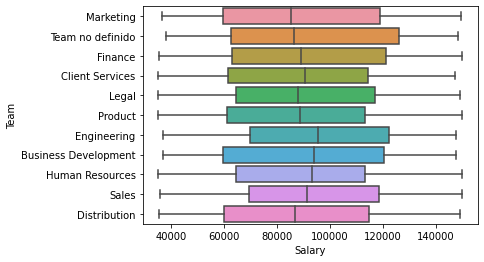

In [39]:
#A contnuación podemos observar la variabilidad entre salarios y equipo donde podemos observar que el equipo de Marketing presenta un salario mas elevado seguido sale,
#ademaás el equipo de ingenieria en conjunto con sales tiene una distribucion de salarios mas carta, es decir que no tiene mucha variación
sns.boxplot(x="Salary",y="Team", data=empleados, )
plt.show()